In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [3]:
encodings_to_try = ['utf-8-sig', 'latin-1', 'ISO-8859-1']

for encoding in encodings_to_try:
    try:
        df = pd.read_csv("C:/Users/15694/Desktop/Cross selling/code/Michelle/variable_without_pca2.csv", encoding=encoding)
        break
    except UnicodeDecodeError:
        continue

In [4]:
df.head()

,SIX_MONTH_BAL_OS_SAVINGS,SIX_MONTH_BAL_OS_CURRENT,SIX_MONTH_BAL_OS_FD,SIX_MONTH_BAL_OS_LEASING,SIX_MONTH_BAL_OS_CARD,SIX_MONTH_BAL_OS_OD,TOTAL_AVG_BAL,FD_AMOUNT_UNDER_LIEN,CURRENT_AMOUNT_UNDER_LIEN,SAVINGS_AMOUNT_UNDER_LIEN,CUSTOMER_PROFITABILITY,NO_OF_ASSERT_ACCOUNTS,NO_OF_LIABILITY_ACCOUNTS,CR_DR_Usage,NPA_FLAG,LOAN_CAT1
0,0.042612,-0.048785,-0.053259,-0.134894,-0.155864,-0.075719,-0.062581,-0.023629,-0.044929,-0.056843,-0.003142,0.397017,1.805905,0.051895,0,3
1,-0.091396,-0.048785,0.066148,-0.134894,-0.297359,-0.075719,-0.050164,-0.023629,-0.044929,-0.056843,-0.010305,-0.623858,0.600067,-0.067204,0,3
2,-0.076329,-0.048785,0.031772,-0.134894,1.262271,-0.059430,-0.065534,-0.023629,-0.044929,-0.056843,-0.006337,1.417891,1.805905,-0.023470,0,0
3,-0.101346,-0.048785,0.308069,-0.134894,-0.297359,-0.075719,-0.010893,-0.023629,-0.044929,-0.056843,0.017446,-0.623858,0.198120,-0.067204,0,3
4,-0.013879,-0.048785,-0.071656,-0.134894,-0.297359,-0.075719,-0.053618,-0.023629,-0.044929,-0.056843,-0.004448,-0.623858,-0.203826,-0.067204,1,4


In [5]:
df.columns

Index(['SIX_MONTH_BAL_OS_SAVINGS', 'SIX_MONTH_BAL_OS_CURRENT',
       'SIX_MONTH_BAL_OS_FD', 'SIX_MONTH_BAL_OS_LEASING',
       'SIX_MONTH_BAL_OS_CARD', 'SIX_MONTH_BAL_OS_OD', 'TOTAL_AVG_BAL',
       'FD_AMOUNT_UNDER_LIEN', 'CURRENT_AMOUNT_UNDER_LIEN',
       'SAVINGS_AMOUNT_UNDER_LIEN', 'CUSTOMER_PROFITABILITY',
       'NO_OF_ASSERT_ACCOUNTS', 'NO_OF_LIABILITY_ACCOUNTS', 'CR_DR_Usage',
       'NPA_FLAG', 'LOAN_CAT1'],
      dtype='object')

In [6]:
df.shape

(11836, 16)

In [7]:
df.isna().sum()

SIX_MONTH_BAL_OS_SAVINGS     0
SIX_MONTH_BAL_OS_CURRENT     0
SIX_MONTH_BAL_OS_FD          0
SIX_MONTH_BAL_OS_LEASING     0
SIX_MONTH_BAL_OS_CARD        0
SIX_MONTH_BAL_OS_OD          0
TOTAL_AVG_BAL                0
FD_AMOUNT_UNDER_LIEN         0
CURRENT_AMOUNT_UNDER_LIEN    0
SAVINGS_AMOUNT_UNDER_LIEN    0
CUSTOMER_PROFITABILITY       0
NO_OF_ASSERT_ACCOUNTS        0
NO_OF_LIABILITY_ACCOUNTS     0
CR_DR_Usage                  0
NPA_FLAG                     0
LOAN_CAT1                    0
dtype: int64

In [8]:
df1=df[["TOTAL_AVG_BAL","SIX_MONTH_BAL_OS_FD","SIX_MONTH_BAL_OS_SAVINGS","CUSTOMER_PROFITABILITY"
        ,"LOAN_CAT1"]]

In [9]:
X = df1.drop(columns=["LOAN_CAT1"])
Y = df1["LOAN_CAT1"]

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score,  classification_report, confusion_matrix

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [12]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from collections import Counter
sm = SMOTE()
X_sm, Y_sm=sm.fit_resample(X_train,y_train)
print('Dataset after resampling:')
print(sorted(Counter(Y_sm).items()))

Dataset after resampling:
[(0, 3221), (1, 3221), (2, 3221), (3, 3221), (4, 3221), (5, 3221)]


### Tree based models

###### Decision Tree

In [13]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [14]:
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_sm, Y_sm)
y_pred_DT = decision_tree.predict(X_test)

In [15]:
acc = accuracy_score(y_test, y_pred_DT)
prec_macro = precision_score(y_test, y_pred_DT, average='macro')
recall_macro = recall_score(y_test, y_pred_DT, average='macro')
f1_macro = f1_score(y_test, y_pred_DT, average='macro')
classification_rep = classification_report(y_test, y_pred_DT)
print("Accuracy Score:", acc)
print("Precision (Macro):", prec_macro)
print("Recall (Macro):", recall_macro)
print("F1 Score (Macro):", f1_macro)

# Confusion Matrix
cf_matrix = confusion_matrix(y_test, y_pred_DT)
print("Confusion Matrix:")
print(cf_matrix)
print("\nClassification Report:\n", classification_rep)

Accuracy Score: 0.557589411433399
Precision (Macro): 0.48952758826898135
Recall (Macro): 0.5313765480773651
F1 Score (Macro): 0.49796165230994255
Confusion Matrix:
[[ 33  24   5   7   1   3]
 [ 94 484 164  97   6   2]
 [ 32 147 245 127  16   8]
 [ 27 107 175 799 169  50]
 [  4   7  12  95 162  58]
 [  0   3  13  27  91 257]]

Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.45      0.25        73
           1       0.63      0.57      0.60       847
           2       0.40      0.43      0.41       575
           3       0.69      0.60      0.64      1327
           4       0.36      0.48      0.41       338
           5       0.68      0.66      0.67       391

    accuracy                           0.56      3551
   macro avg       0.49      0.53      0.50      3551
weighted avg       0.59      0.56      0.57      3551



In [16]:

y_pred_train_DT = decision_tree.predict(X_sm)

In [17]:
acc = accuracy_score(Y_sm, y_pred_train_DT)
prec_macro = precision_score(Y_sm, y_pred_train_DT, average='macro')
recall_macro = recall_score(Y_sm, y_pred_train_DT, average='macro')
f1_macro = f1_score(Y_sm, y_pred_train_DT, average='macro')
classification_rep_DT = classification_report(Y_sm,y_pred_train_DT)
print("Accuracy Score:", acc)
print("Precision (Macro):", prec_macro)
print("Recall (Macro):", recall_macro)
print("F1 Score (Macro):", f1_macro)

# Confusion Matrix
cf_matrix_DT = confusion_matrix(Y_sm, y_pred_train_DT)
print("Confusion Matrix:")
print(cf_matrix_DT)
print("\nClassification Report:\n", classification_rep_DT)

Accuracy Score: 0.9999482562351236
Precision (Macro): 0.999948272294641
Recall (Macro): 0.9999482562351236
F1 Score (Macro): 0.9999482562338767
Confusion Matrix:
[[3221    0    0    0    0    0]
 [   0 3221    0    0    0    0]
 [   0    0 3221    0    0    0]
 [   0    1    0 3220    0    0]
 [   0    0    0    0 3221    0]
 [   0    0    0    0    0 3221]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3221
           1       1.00      1.00      1.00      3221
           2       1.00      1.00      1.00      3221
           3       1.00      1.00      1.00      3221
           4       1.00      1.00      1.00      3221
           5       1.00      1.00      1.00      3221

    accuracy                           1.00     19326
   macro avg       1.00      1.00      1.00     19326
weighted avg       1.00      1.00      1.00     19326



##### pre pruning

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
param_grid = {
        'max_depth': range(2,50,1),
         'min_samples_split': range(1,5,1),
         'min_samples_leaf': range(2,5,1)}

In [20]:
dtree = tree.DecisionTreeClassifier(random_state=0)
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_sm, Y_sm)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
720 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", li

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(2, 50),
                         'min_samples_leaf': range(2, 5),
                         'min_samples_split': range(1, 5)})

In [21]:
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

Best hyperparameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [22]:
best_dtree_pp = DecisionTreeClassifier(max_depth=17, min_samples_leaf=2, min_samples_split=2)
best_dtree_pp.fit(X_sm, Y_sm)
y_pred_pre = best_dtree_pp.predict(X_test)

In [23]:
acc = accuracy_score(y_test, y_pred_pre)
prec_macro = precision_score(y_test, y_pred_pre, average='macro')
recall_macro = recall_score(y_test, y_pred_pre, average='macro')
f1_macro = f1_score(y_test, y_pred_pre, average='macro')
classification_rep_pre = classification_report(y_test, y_pred_pre)
print("Accuracy Score:", acc)
print("Precision (Macro):", prec_macro)
print("Recall (Macro):", recall_macro)
print("F1 Score (Macro):", f1_macro)

# Confusion Matrix
cf_matrix_pre = confusion_matrix(y_test, y_pred_pre)
print("Confusion Matrix:")
print(cf_matrix_pre)
print("\n Test Classification Report:\n", classification_rep_pre)

Accuracy Score: 0.5823711630526612
Precision (Macro): 0.5130184004494125
Recall (Macro): 0.5520602201862411
F1 Score (Macro): 0.5175544574344363
Confusion Matrix:
[[ 36  25   3   6   0   3]
 [104 522 157  58   5   1]
 [ 34 157 262 106   9   7]
 [ 28 112 166 837 151  33]
 [  6   5  16  98 163  50]
 [  0   3  13  33  94 248]]

 Test Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.49      0.26        73
           1       0.63      0.62      0.62       847
           2       0.42      0.46      0.44       575
           3       0.74      0.63      0.68      1327
           4       0.39      0.48      0.43       338
           5       0.73      0.63      0.68       391

    accuracy                           0.58      3551
   macro avg       0.51      0.55      0.52      3551
weighted avg       0.61      0.58      0.59      3551



In [24]:
y_pred_pre_train = best_dtree_pp.predict(X_sm)

In [25]:
acc = accuracy_score(Y_sm, y_pred_pre_train )
prec_macro = precision_score(Y_sm, y_pred_pre_train , average='macro')
recall_macro = recall_score(Y_sm, y_pred_pre_train, average='macro')
f1_macro = f1_score(Y_sm, y_pred_pre_train , average='macro')
classification_rep_pre_train = classification_report(Y_sm,y_pred_pre_train)
print("Accuracy Score:", acc)
print("Precision (Macro):", prec_macro)
print("Recall (Macro):", recall_macro)
print("F1 Score (Macro):", f1_macro)

# Confusion Matrix
cf_matrix_DT_pre = confusion_matrix(Y_sm, y_pred_pre_train)
print("Confusion Matrix:")
print(cf_matrix_DT_pre)
print("\n Train Classification Report:\n", classification_rep_pre_train )

Accuracy Score: 0.9205733209148298
Precision (Macro): 0.9214102161319682
Recall (Macro): 0.9205733209148298
F1 Score (Macro): 0.9206677716812283
Confusion Matrix:
[[3184   18    3   16    0    0]
 [  82 3002   82   49    3    3]
 [  28  198 2909   77    8    1]
 [  21  125  224 2771   69   11]
 [   5   15   34  201 2950   16]
 [   1    7   20   84  134 2975]]

 Train Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      3221
           1       0.89      0.93      0.91      3221
           2       0.89      0.90      0.90      3221
           3       0.87      0.86      0.86      3221
           4       0.93      0.92      0.92      3221
           5       0.99      0.92      0.96      3221

    accuracy                           0.92     19326
   macro avg       0.92      0.92      0.92     19326
weighted avg       0.92      0.92      0.92     19326



#### post pruning

In [26]:
decision_tree = DecisionTreeClassifier(random_state=0)

In [27]:
path = decision_tree.cost_complexity_pruning_path(X_sm, Y_sm)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.00000000e+00 1.72479216e-05 3.44958433e-05 ... 4.94145413e-02
 5.67899242e-02 1.15857281e-01]


In [28]:
# For each alpha we will append our model to a list
decision_trees = []
for ccp_alpha in ccp_alphas:
    decision_tree = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    decision_tree.fit(X_sm, Y_sm)
    decision_trees.append(decision_tree)
print("Number of nodes in the last tree is :{} with ccp_alpha:{}".format(
decision_trees[-1].tree_.node_count,ccp_alphas[-1]))

Number of nodes in the last tree is :1 with ccp_alpha:0.11585728107509075


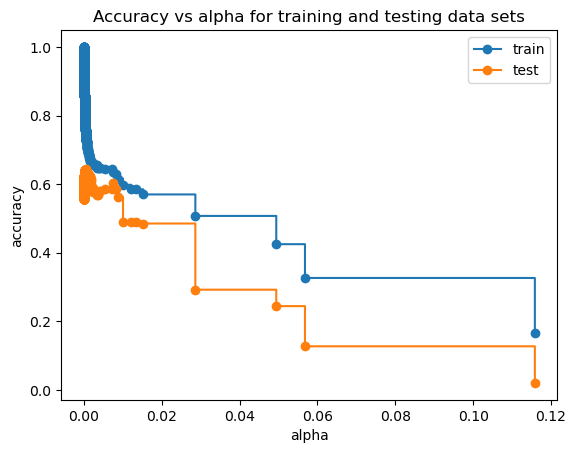

In [29]:
train_scores=[decision_tree.score(X_sm, Y_sm) for decision_tree in decision_trees]
test_scores=[decision_tree.score(X_test, y_test) for decision_tree in decision_trees]

fig,ax =plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing data sets")
ax.plot(ccp_alphas,train_scores,marker='o',label="train",drawstyle="steps-post")
ax.plot(ccp_alphas,test_scores,marker='o',label="test",drawstyle="steps-post")

ax.legend()
plt.show()

In [30]:
decision_tree = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.001)
decision_tree.fit(X_sm, Y_sm)

y_train_pred_po = decision_tree.predict(X_sm)
y_test_pred_po = decision_tree.predict(X_test)

In [31]:
acc = accuracy_score(y_test, y_test_pred_po)
prec_macro = precision_score(y_test, y_test_pred_po, average='macro')
recall_macro = recall_score(y_test, y_test_pred_po, average='macro')
f1_macro = f1_score(y_test, y_test_pred_po, average='macro')
classification_rep_po = classification_report(y_test, y_test_pred_po)
print("Accuracy Score:", acc)
print("Precision (Macro):", prec_macro)
print("Recall (Macro):", recall_macro)
print("F1 Score (Macro):", f1_macro)

# Confusion Matrix
cf_matrix_po= confusion_matrix(y_test, y_test_pred_po)
print("Confusion Matrix:")
print(cf_matrix_po)
print("\n Test Classification Report:\n", classification_rep_po)

Accuracy Score: 0.620107012109265
Precision (Macro): 0.5733944464312176
Recall (Macro): 0.6403779636900663
F1 Score (Macro): 0.5698724607135381
Confusion Matrix:
[[ 51  10  10   0   0   2]
 [171 371 238  59   8   0]
 [ 19  82 372  81  17   4]
 [ 19  23 220 901 138  26]
 [  4   0   6  68 207  53]
 [  0   1   0  14  76 300]]

 Test Classification Report:
               precision    recall  f1-score   support

           0       0.19      0.70      0.30        73
           1       0.76      0.44      0.56       847
           2       0.44      0.65      0.52       575
           3       0.80      0.68      0.74      1327
           4       0.46      0.61      0.53       338
           5       0.78      0.77      0.77       391

    accuracy                           0.62      3551
   macro avg       0.57      0.64      0.57      3551
weighted avg       0.69      0.62      0.63      3551



In [32]:
acc = accuracy_score(Y_sm, y_train_pred_po )
prec_macro = precision_score(Y_sm, y_train_pred_po , average='macro')
recall_macro = recall_score(Y_sm, y_train_pred_po, average='macro')
f1_macro = f1_score(Y_sm, y_train_pred_po , average='macro')
classification_rep_DT_po = classification_report(Y_sm,y_train_pred_po )
print("Accuracy Score:", acc)
print("Precision (Macro):", prec_macro)
print("Recall (Macro):", recall_macro)
print("F1 Score (Macro):", f1_macro)

# Confusion Matrix
cf_matrix_po = confusion_matrix(Y_sm, y_train_pred_po)
print("Confusion Matrix:")
print(cf_matrix_po)
print("\n Train Classification Report:\n", classification_rep_DT_po)

Accuracy Score: 0.6953327124081549
Precision (Macro): 0.6985309119145633
Recall (Macro): 0.6953327124081549
F1 Score (Macro): 0.6931472341844654
Confusion Matrix:
[[2696  235  205   52   32    1]
 [ 584 1599  833  167   31    7]
 [  75  431 2213  376   95   31]
 [  27   41  607 2122  363   61]
 [   5    3   20  540 2133  520]
 [   0    0    6   87  453 2675]]

 Train Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82      3221
           1       0.69      0.50      0.58      3221
           2       0.57      0.69      0.62      3221
           3       0.63      0.66      0.65      3221
           4       0.69      0.66      0.67      3221
           5       0.81      0.83      0.82      3221

    accuracy                           0.70     19326
   macro avg       0.70      0.70      0.69     19326
weighted avg       0.70      0.70      0.69     19326



In [33]:
from sklearn.metrics import roc_curve,auc

In [34]:
y_prob=decision_tree.predict_proba(X_test)

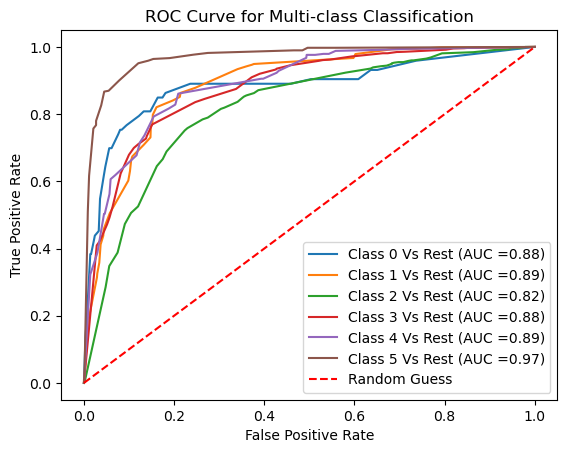

In [35]:
for i in range(len(np.unique(Y))):
    fpt,tpr,_=roc_curve(y_test==i,y_prob[:,i])
    roc_auc=auc(fpt,tpr)
    plt.plot(fpt,tpr,label=f'Class {i} Vs Rest (AUC ={roc_auc:.2f})')
    
plt.plot([0,1],[0,1],linestyle='--',color='r',label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-class Classification')
plt.legend()
plt.show()

In [36]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_prob,multi_class='ovr')

0.8882895356587475